In [3]:
train_df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [4]:
train_df.excerpt[0]

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.'

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2834 non-null   object 
 1   url_legal       830 non-null    object 
 2   license         830 non-null    object 
 3   excerpt         2834 non-null   object 
 4   target          2834 non-null   float64
 5   standard_error  2834 non-null   float64
dtypes: float64(2), object(4)
memory usage: 133.0+ KB


In [6]:
test_df.head()

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         7 non-null      object
 1   url_legal  3 non-null      object
 2   license    3 non-null      object
 3   excerpt    7 non-null      object
dtypes: object(4)
memory usage: 352.0+ bytes


In [8]:
sample_submission.head()

,id,target
0,c0f722661,0.0
1,f0953f0a5,0.0
2,0df072751,0.0
3,04caf4e0c,0.0
4,0e63f8bea,0.0


# **General Statistic**

In [9]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import scipy.stats as stats

def plot_target(target):
    
    # Print statistics
    print(f'{target}\n{"-" * len(target)}')
    print(f'Mean: {train_df[target].mean():.4}  -  Median: {train_df[target].median():.4}  -  Std: {train_df[target].std():.4}')
    print(f'Min: {train_df[target].min():.4}  -  25%: {train_df[target].quantile(0.25):.4}  -  50%: {train_df[target].quantile(0.5):.4}  -  75%: {train_df[target].quantile(0.75):.4}  -  Max: {train_df[target].max():.4}')
    print(f'Skew: {train_df[target].skew():.4}  -  Kurtosis: {train_df[target].kurtosis():.4}')
    missing_values_count = train_df[train_df[target].isnull()].shape[0]
    training_samples_count = train_df.shape[0]
    print(f'Missing Values: {missing_values_count}/{training_samples_count} ({missing_values_count * 100 / training_samples_count:.4}%)')

    # Create subplots: 1 row, 2 columns
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f'{target} Distribution in Training Set', f'{target} Probability Plot'))

    # KDE plot
    fig.add_trace(
        go.Histogram(x=train_df[target], histnorm='probability density'),
        row=1, col=1
    )

    # Add mean and median lines
    mean_val = train_df[target].mean()
    median_val = train_df[target].median()

    fig.add_shape(
        go.layout.Shape(type='line', x0=mean_val, x1=mean_val, y0=0, y1=1, yref='paper', line=dict(color='Red')),
        row=1, col=1
    )
    fig.add_shape(
        go.layout.Shape(type='line', x0=median_val, x1=median_val, y0=0, y1=1, yref='paper', line=dict(color='Blue')),
        row=1, col=1
    )

    # Add annotations for mean and median
    fig.add_annotation(
        x=mean_val, y=0.9, yref="paper", text=f"Mean: {mean_val:.4}", showarrow=True, arrowhead=7, ax=-160, ay=20,
        row=1, col=1
    )
    fig.add_annotation(
        x=median_val, y=0.8, yref="paper", text=f"Median: {median_val:.4}", showarrow=True, arrowhead=7, ax=80, ay=80,
        row=1, col=1
    )

    # Probability plot
    res = stats.probplot(train_df[target], plot=None)
    fig.add_trace(
        go.Scatter(x=res[0][0], y=res[0][1], mode='markers'),
        row=1, col=2
    )

    fig.update_layout(height=600, width=1200, title_text=f'{target} Analysis')
    fig.show()

# Assuming train_df is already defined and has a column named 'target'
plot_target('target')


target
------
Mean: -0.9593  -  Median: -0.9122  -  Std: 1.034
Min: -3.676  -  25%: -1.69  -  50%: -0.9122  -  75%: -0.2025  -  Max: 1.711
Skew: -0.1309  -  Kurtosis: -0.4921
Missing Values: 0/2834 (0.0%)


### General Statistics
- **Mean**: -0.9593
- **Median**: -0.9122
- **Standard Deviation**: 1.034
- **Min**: -3.676
- **25th Percentile**: -1.69
- **50th Percentile (Median)**: -0.9122
- **75th Percentile**: -0.2025
- **Max**: 1.711
- **Skewness**: -0.1309
- **Kurtosis**: -0.4921
- **Missing Values**: 0

### Insights

#### Mean and Median
- The mean and median are both negative, suggesting that the majority of the data points are below zero.
- The mean and median are fairly close, indicating that the data is somewhat symmetrically distributed around the central value.

#### Standard Deviation
- The standard deviation is 1.034, which suggests that the data points are dispersed around the mean but not too widely.

#### Min, Max, and Quartiles
- The minimum and maximum values indicate the range of the data, which is from -3.676 to 1.711.
- The 25th, 50th, and 75th percentiles can help us understand the data distribution and identify any potential outliers.

#### Skewness
- The skewness is -0.1309, which is close to zero. This suggests that the data is nearly symmetric.

#### Kurtosis
- The kurtosis is -0.4921, which is less than zero, indicating that the data has lighter tails and fewer outliers than a normal distribution.

#### Missing Values
- There are no missing values, which is good for analysis.

### Probability Plot
- A probability plot would help in assessing how the data fits a normal distribution.
- the data points in the probability plot follow the theoretical line for a normal distribution.

# **Reliability of the Target Values**

In [10]:
import plotly.express as px

# Filter out rows where standard_error is zero
no_baseline = train_df['standard_error'] > 0
filtered_df = train_df.loc[no_baseline]

# Create the scatter plot
fig = px.scatter(filtered_df, x='target', y='standard_error', 
                 title='Standard_error vs Target',
                 labels={'target': 'target', 'standard_error': 'standard_error'},
                 width=800, height=400)

# Customize axis labels and tick marks
fig.update_xaxes(title_font=dict(size=15, family='Arial, sans-serif'),
                 tickfont=dict(size=12))
fig.update_yaxes(title_font=dict(size=15, family='Arial, sans-serif'),
                 tickfont=dict(size=12))

# Show the plot
fig.show()


# **Visualize the relationship between sentence length and readability scores.**

In [11]:
# This function takes a POS (Part-of-Speech) tag in the Treebank format and 
# returns its equivalent WordNet POS tag. 
# This is useful for lemmatization, which often requires WordNet POS tags.
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Removes all characters that are not alphabets or numbers and converts the text to lowercase.
    text = re.sub('[^A-Za-z0-9]+', ' ', text.lower())
    
    # Tokenizes the cleaned text into words.
    words = nltk.word_tokenize(text)
    
    # Tags the words with their POS tags.
    tagged = nltk.pos_tag(words)
    
    # Lemmatizes the words based on their POS tags.
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged]
    words = [word for word in words if word not in stopwords.words('english')]
    return words

def get_ngrams(words, n):
    # returns a list of n-grams
    return [tuple(words[i:i+n]) for i in range(len(words)-n+1)]

# Initializes an empty list to store the processed text and its features.
corpus = []
for text, target in train_df[['excerpt', 'target']].itertuples(index=False):
    sentences = []
    for sentence in nltk.sent_tokenize(text):  # Corrected typo here
        words = clean_text(sentence)  # Added this line to define 'words'
        unigrams = get_ngrams(words, n=1)
        bigrams = get_ngrams(words, n=2)
        trigrams = get_ngrams(words, n=3)
        sentences.append(words)
    corpus.append({
        'target' : target,
        'text' : text,
        'sentences' : sentences,
        'unigrams' : unigrams,
        'bigrams' : bigrams,
        'trigrams' : trigrams,
    })

corpus = sorted(corpus, key=lambda x: x['target'])

In [12]:
corpus[0]

{'target': -3.676267773,
 'text': 'The commutator is peculiar, consisting of only three segments of a copper ring, while in the simplest of other continuous current generators several times that number exist, and frequently 120! segments are to be found. These three segments are made so as to be removable in a moment for cleaning or replacement. They are mounted upon a metal support, and are surrounded on all sides by a free air space, and cannot, therefore, lose their insulated condition. This feature of air insulation is peculiar to this system, and is very important as a factor in the durability of the commutator. Besides this, the commutator is sustained by supports carried in flanges upon the shaft, which flanges, as an additional safeguard, are coated all over with hard rubber, one of the finest known insulators. It may be stated, without fear of contradiction, that no other commutator made is so thoroughly insulated and protected. The three commutator segments virtually constitu

In [13]:
# contains texts with the lowest readability scores.
top_lowest = corpus[:500]

# Calculates the average sentence length for each text in top_lowest
lowest_target_sentence_lengths = [ \
    np.mean([len(sentence) for sentence in datapoint['sentences']]) \
    for datapoint in top_lowest \
]

# presumably contains texts with the highest readability scores.
top_highest = corpus[-500:]

highest_target_sentence_lengths = [ \
    np.mean([len(sentence) for sentence in datapoint['sentences']]) \
    for datapoint in top_highest \
]

top_lowest_mean = np.mean(lowest_target_sentence_lengths)
top_lowest_std = np.std(lowest_target_sentence_lengths)
top_highest_mean = np.mean(highest_target_sentence_lengths)
top_highest_std = np.std(highest_target_sentence_lengths)

In [14]:
# Data preparation
categories = ['Top lowest readability', 'Top highest readability']
means = [top_lowest_mean, top_highest_mean]
std_devs = [top_lowest_std, top_highest_std]

# Create the figure
fig = go.Figure()

# Add the bar chart
fig.add_trace(go.Bar(
    x=categories,
    y=means,
    error_y=dict(type='data', array=std_devs),
    marker=dict(color=['red', 'blue']),
    name='Mean Sentence Length'
))

# Customize the layout
fig.update_layout(
    title='Average Sentence Length and Readability',
    xaxis_title='Readability Category',
    yaxis_title='Average Sentence Length',
    template='plotly_white'
)

# Show the figure
fig.show()

This visualization can help you understand if there's a relationship between sentence length and readability: for example, whether texts with lower readability scores tend to have longer or shorter sentences compared to those with higher readability scores.

This graph also suggests that the two groups are likely different with respect to their average sentence lengths. However, this observation alone is not sufficient for a rigorous statistical conclusion.

Let's proves it with hypothesis testing.

## t-test

In [15]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(lowest_target_sentence_lengths, highest_target_sentence_lengths)

# Check if the result is statistically significant
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference between the two groups is statistically significant.")
else:
    print("The difference between the two groups is not statistically significant.")


The difference between the two groups is statistically significant.


# **Viz it in WordCloud**

In [16]:

def text_cleaning(excerpt):
    # Use string.punctuation to remove all punctuation characters
    excerpt = ''.join([k for k in excerpt if k not in string.punctuation])
    
    # Convert to Lowercase and Remove Special Characters
    # Strip Leading and Trailing Spaces
    excerpt = re.sub('[^A-Za-z0-9]+', ' ', str(excerpt).lower()).strip()
    
    return excerpt

In [17]:
%%time
tqdm.pandas()
train_df['excerpt'] = train_df['excerpt'].progress_apply(text_cleaning)

100%|██████████| 2834/2834 [00:00<00:00, 7477.23it/s]

CPU times: user 382 ms, sys: 859 µs, total: 383 ms
Wall time: 383 ms


In [18]:
# Function to split text into words
def split_into_words(text):
    return str(text).split()

# Apply the function to the 'excerpt' column
train_df['temp_list'] = train_df['excerpt'].apply(split_into_words)


# Python's Counter to count the frequency of each unique word across all the excerpts. 
# It flattens the list of lists into a single list and then counts the occurrences of each word.
word_counts = Counter(word for words_list in train_df['temp_list'] for word in words_list)

# Create a DataFrame from the most common words
common_words_df = pd.DataFrame(word_counts.most_common(), columns=['Common_words', 'count'])

# Get the top 20 most common words
top_20_common_words = common_words_df.nlargest(20, 'count')

# Style the DataFrame
styled_df = top_20_common_words.style.background_gradient(cmap='Oranges')

# Display the styled DataFrame
styled_df


,Common_words,count
0,the,33863
1,and,16907
2,of,15305
3,to,12835
4,a,12087
5,in,9103
6,was,5785
7,is,5344
8,that,5272
9,it,5077


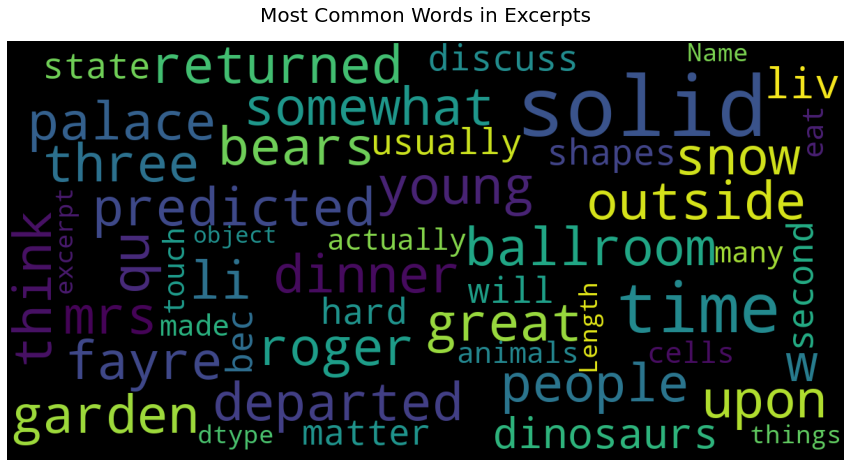

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def show_wordcloud(data, title=None, max_words=200, max_font_size=40, background_color='black'):
    """
    Generate and show a word cloud from a text dataset.
    
    Parameters:
    - data: Text data for the word cloud.
    - title: Optional title for the plot.
    - max_words: Maximum number of words to display.
    - max_font_size: Maximum font size for the largest word.
    - background_color: Background color for the word cloud image.
    """
    # Generate the word cloud
    wordcloud = WordCloud(
        background_color=background_color,
        stopwords=set(STOPWORDS),
        max_words=max_words,
        max_font_size=max_font_size,
        scale=3,
        random_state=1  # Random state for reproducibility
    ).generate(str(data))

    # Create the plot
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    
    if title:
        plt.title(title, fontsize=20, pad=20)
        
    plt.imshow(wordcloud)
    plt.show()

# Example usage
show_wordcloud(train_df['excerpt'], title='Most Common Words in Excerpts')


In [20]:
from wordcloud import WordCloud, STOPWORDS

def generate_wordcloud(data, max_words=200, max_font_size=40, background_color='black'):
    wordcloud = WordCloud(
        background_color=background_color,
        stopwords=set(STOPWORDS),
        max_words=max_words,
        max_font_size=max_font_size,
        scale=3,
        random_state=1
    ).generate(str(data))
    
    return wordcloud

# Generate the word cloud
wordcloud = generate_wordcloud(train_df['excerpt'])



In [21]:
# Get the frequencies
word_frequencies = wordcloud.words_

# Sort them and get the top 10
sorted_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 words and their relative frequencies:")
print("\n".join([f"{word}: {freq}\n" for word, freq in sorted_words]))



Top 10 words and their relative frequencies:
solid: 1.0

time: 0.6666666666666666

young: 0.3333333333333333

people: 0.3333333333333333

returned: 0.3333333333333333

ballroom: 0.3333333333333333

dinner: 0.3333333333333333

mrs: 0.3333333333333333

fayre: 0.3333333333333333

somewhat: 0.3333333333333333



It is a relative frequency. For example, if the most common word appears 100 times, and another word appears 60 times, the relative frequency of the latter would be 60/100 = 0.6.

# 4. Modelling

**RoBerta model**

a. Training the model

In [22]:
import numpy as np 
import pandas as pd 

import os
from transformers import *

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import random

import torch
import torch.nn as nn

from torch.utils.data import DataLoader, Dataset

from tqdm import tqdm

In [23]:
def set_seed(seed=123):
    """
    Sets the seed for reproducibility in multiple libraries.
    
    Parameters:
        seed (int): The seed value. Default is 123.
        
    Returns:
        random_state (numpy RandomState object): Numpy random state object
    """
    # Numpy
    np.random.seed(seed)
    random_state = np.random.RandomState(seed)
    
    # Python's built-in random package
    random.seed(seed)
    
    # PyTorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
    # Python Environment
    os.environ['PYTHONHASHSEED'] = str(seed)
    
    return random_state

# Usage
seed = 689
random_state = set_seed(seed)


In [24]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [26]:
train_df['excerpt_len'] = train_df.excerpt.apply(lambda x: len(split_into_words(x)))

In [27]:
print(train_df.excerpt_len.max())

205


In [28]:
from sklearn.model_selection import KFold

def assign_folds(df, n_splits=5):
    """
    Assigns fold numbers to the DataFrame for cross-validation.
    
    Parameters:
        df (DataFrame): The DataFrame containing the data.
        n_splits (int): The number of splits for KFold cross-validation.
        
    Returns:
        df (DataFrame): DataFrame with an additional 'fold' column.
    """
    df['fold'] = -1
    gkf = KFold(n_splits=n_splits)
    
    for fold, (_, val) in enumerate(gkf.split(df['excerpt'], df['target'])):
        df.loc[val, 'fold'] = fold
    
    return df

def split_data_by_fold(df, fold=0):
    """
    Splits the DataFrame into training and validation sets based on the fold number.
    
    Parameters:
        df (DataFrame): The DataFrame containing the data.
        fold (int): The fold number for the validation set. The default is fold "0".
        
    Returns:
        train_df (DataFrame): Training set DataFrame.
        validation_df (DataFrame): Validation set DataFrame.
    """
    validation_df = df[df['fold'] == fold].reset_index(drop=True)
    train_df = df[df['fold'] != fold].reset_index(drop=True)
    
    return train_df, validation_df

# Usage
train_df = assign_folds(train_df)


In [29]:
train_df.head()

,id,url_legal,license,excerpt,target,standard_error,excerpt_len,fold
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,179,0
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,169,0
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,166,0
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,164,0
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,147,0


In [30]:
train_df, validation_df = split_data_by_fold(train_df, fold=0)


In [31]:
train_df.head()

,id,url_legal,license,excerpt,target,standard_error,excerpt_len,fold
0,5f1e73614,https://en.wikipedia.org/wiki/Seven_Years%27_War,CC BY-SA 3.0,The Seven Years' War was a world war fought be...,-2.098625,0.479827,185,1
1,f80bf00cd,https://kids.frontiersin.org/article/10.3389/f...,CC BY 4.0,Why do animals put their energy into making li...,-0.424982,0.496221,175,1
2,8fa893ad4,https://en.wikipedia.org/wiki/Silk_Road,CC BY-SA 3.0,The Silk Road derives its name from the lucrat...,-0.344270,0.462797,183,1
3,3c1674b21,https://kids.frontiersin.org/article/10.3389/f...,CC BY 4.0,"To practice their knowledge and skills, doctor...",-0.878021,0.446454,177,1
4,a4fa3021c,https://en.wikipedia.org/wiki/Smartwatch,CC BY-SA 3.0,A smartwatch is a computerized wristwatch with...,-1.277950,0.462814,148,1


In [32]:
validation_df.head()

,id,url_legal,license,excerpt,target,standard_error,excerpt_len,fold
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,179,0
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,169,0
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,166,0
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,164,0
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,147,0


In [33]:
"""train_df['fold'] = -1
gkf = KFold(n_splits=5)
for fold, (train, val) in enumerate(gkf.split(train_df.excerpt, train_df.target)):
    train_df.loc[val,'fold']=fold

fold = 0
validation_df = train_df[train_df.fold==0].reset_index(drop=True)
train_df = train_df[train_df.fold!=0].reset_index(drop=True)"""

"train_df['fold'] = -1\ngkf = KFold(n_splits=5)\nfor fold, (train, val) in enumerate(gkf.split(train_df.excerpt, train_df.target)):\n    train_df.loc[val,'fold']=fold\n\nfold = 0\nvalidation_df = train_df[train_df.fold==0].reset_index(drop=True)\ntrain_df = train_df[train_df.fold!=0].reset_index(drop=True)"

In [34]:
print(train_df.target.mean(), validation_df.target.mean())

-0.9706019936700485 -0.91420577515873


Insights:

The averages are fairly close to each other, which is generally a good sign. It suggests that the training and validation sets are similarly distributed in terms of the target variable, assuming the target is a measure of some kind of performance or score.

In [35]:
class Data(Dataset):
    def __init__(self, data):
        # super() function returns a temporary object of the "superclass", allowing you to call its methods - __init__()
        # __init__() ensure to initialize the parent class, "Dataset" class from PyTorch.
        super().__init__()
        self.data = data

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):       
        excerpt = self.data.excerpt[idx]
        target = self.data.target[idx]
        return excerpt, target

In [36]:
train_data = Data(data = train_df) 
train_loader = DataLoader(dataset = train_data, shuffle=True, batch_size = 8)

val_data = Data(data = validation_df) 
val_loader = DataLoader(dataset = val_data, shuffle=False, batch_size = 64)

In [37]:
# Define a custom model class inheriting from PreTrainedModel
class ReadabilityModel(PreTrainedModel): 
    # Initialize the model
    def __init__(self, conf):
        # Initialize the parent class (PreTrainedModel)
        super(ReadabilityModel, self).__init__(conf) 
        
        # Load the RobertaModel with the given configuration
        self.roberta = RobertaModel.from_pretrained(model_name, config=conf)
        
        # Define a dropout layer with a dropout rate of 0.1
        self.drop_out = nn.Dropout(0.1)
        
        # Define a linear layer with input size 768 and output size 1
        # the output from RoBERTa has a size of 768, so the input size of the linear layer is also 768.
        #  * 1 because it is the last hidden layer
        self.l1 = nn.Linear(768 * 1, 1)
        
        # Initialize the weights of the linear layer with a normal distribution
        # default is 0.02, work well generally
        torch.nn.init.normal_(self.l1.weight, std=0.02)
    
    # Define the forward pass
    def forward(self, ids, mask):
        # Forward pass through Roberta model
        out = self.roberta(
            input_ids=ids,
            attention_mask=mask
        )
        
        # Extract the hidden states from the output
        out = out['hidden_states']
        
        # Take the last hidden state
        # The final layer's hidden state is often considered the most informative one because 
        # it has gone through the most transformations and thus has had the most opportunity to "learn" from the input data.
        out = out[-1]
        
        # Apply dropout
        out = self.drop_out(out)
        
        # Compute the mean across the sequence
        out = torch.mean(out, 1, True)
        
        # Pass through the linear layer
        preds = self.l1(out)

        # Remove the last two dimensions to get the final predictions
        preds = preds.squeeze(-1).squeeze(-1)

        return preds


In [38]:
tokenizer = RobertaTokenizerFast.from_pretrained(model_name)

model_config = RobertaConfig.from_pretrained(model_name)
model_config.output_hidden_states = True

model = ReadabilityModel(model_config)
model = model.to(device)

optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)
scheduler = get_constant_schedule_with_warmup(optimizer, 100)

loss_fct = nn.MSELoss()

epochs = 3

In [39]:
"""# Loop through each epoch
for epoch in range(epochs):
    # Set the model to training mode
    model.train()
    
    # Loop through each batch of data in the training DataLoader
    for i, (excerpts, targets) in enumerate(tqdm(train_loader)):
        # Zero out any gradients from the previous iteration
        optimizer.zero_grad()
        
        # Tokenize the excerpts using the tokenizer
        batch = tokenizer(list(excerpts), truncation=True, padding=True, return_tensors='pt', add_special_tokens=True)
        
        # Extract input IDs and attention masks and move them to the device
        input_ids = batch['input_ids'].to(device, dtype=torch.long)
        attention_mask = batch['attention_mask'].to(device, dtype=torch.long)
        
        # Move targets to the device
        targets = torch.tensor(targets).to(device, dtype=torch.float)
        
        # Forward pass through the model
        preds = model(input_ids, attention_mask)
        
        # Compute the loss using RMSE
        loss = torch.sqrt(loss_fct(preds, targets))
        
        # Backward pass to compute gradients
        loss.backward()
        
        # Update model parameters
        optimizer.step()
        
        # Update learning rate
        scheduler.step()
        
        # Accumulate the training loss
        if i == 0:
            loss_train = loss.item()
        else:
            loss_train += loss.item()
    
    # Compute the average training loss for the epoch
    loss_train = loss_train / (i + 1)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Loop through each batch of data in the validation DataLoader
    with torch.no_grad():
        for i, (excerpts, targets) in enumerate(tqdm(val_loader)):
            # Tokenize and move data to the device as before
            batch = tokenizer(list(excerpts), truncation=True, padding=True, return_tensors='pt', add_special_tokens=True)
            input_ids = batch['input_ids'].to(device, dtype=torch.long)
            attention_mask = batch['attention_mask'].to(device, dtype=torch.long)
            targets = torch.tensor(targets).to(device, dtype=torch.float)
            
            # Forward pass
            preds = model(input_ids, attention_mask)
            
            # Compute the loss
            loss = torch.sqrt(loss_fct(preds, targets)).item()
            
            # Move predictions and targets back to CPU and detach from computation graph
            preds = preds.cpu().detach().numpy()
            targets = targets.cpu().detach().numpy()
            
            # Accumulate the validation loss and predictions
            if i == 0:
                loss_val = loss
                preds_val = preds
                targets_val = targets
            else:
                loss_val += loss
                preds_val = np.concatenate((preds_val, preds), axis=None)
                targets_val = np.concatenate((targets_val, targets), axis=None)
        
        # Compute the average validation loss for the epoch
        loss_val = loss_val / (i + 1)
        
        # Compute the RMSE on the validation set
        rms_val = mean_squared_error(targets_val, preds_val, squared=False)
        
        # Print the epoch summary
        print('Epoch: {} - Loss: {:.6f} - Loss val: {:.6f} - RMSE: {:.3f}'.format(
            epoch + 1, loss_train, loss_val, rms_val))
"""

"# Loop through each epoch\nfor epoch in range(epochs):\n    # Set the model to training mode\n    model.train()\n    \n    # Loop through each batch of data in the training DataLoader\n    for i, (excerpts, targets) in enumerate(tqdm(train_loader)):\n        # Zero out any gradients from the previous iteration\n        optimizer.zero_grad()\n        \n        # Tokenize the excerpts using the tokenizer\n        batch = tokenizer(list(excerpts), truncation=True, padding=True, return_tensors='pt', add_special_tokens=True)\n        \n        # Extract input IDs and attention masks and move them to the device\n        input_ids = batch['input_ids'].to(device, dtype=torch.long)\n        attention_mask = batch['attention_mask'].to(device, dtype=torch.long)\n        \n        # Move targets to the device\n        targets = torch.tensor(targets).to(device, dtype=torch.float)\n        \n        # Forward pass through the model\n        preds = model(input_ids, attention_mask)\n        \n      

In [40]:
# torch.save(model.state_dict(), 'roberta_baseline.bin')

b. Inferencing the  model

In [42]:
test_df

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...
5,12537fe78,NaN,NaN,"To explain transitivity, let us look first at ..."
6,965e592c0,https://www.africanstorybook.org/#,CC BY 4.0,Milka and John are playing in the garden. Her ...


# Predict before params tunning

In [43]:
# this class returns only "excerpt", the previous Data class returns 2 columns.
class Data(Dataset):
    def __init__(self, data):
        super().__init__()
        self.data = data

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):       
        excerpt = self.data.excerpt[idx]
        return excerpt

In [44]:
test_data = Data(data = test_df) 
test_loader = DataLoader(dataset = test_data, shuffle=False, batch_size = 64)

In [45]:
class ReadabilityModel(PreTrainedModel): 
    def __init__(self, conf):
        super(ReadabilityModel, self).__init__(conf) 
        # In this version, it's initialized directly with RobertaModel(config=conf). 
        # The difference is that the former loads a pre-trained model, 
        # this one initializes a new model with the given configuration.
        # it will be set below.
        self.roberta = RobertaModel(config=conf)
        
        self.drop_out = nn.Dropout(0.1)
        
        # the output from RoBERTa has a size of 768, so the input size of the linear layer is also 768.
        self.l1 = nn.Linear(768 * 1, 1)
        
        # default is 0.02, work well generally
        torch.nn.init.normal_(self.l1.weight, std=0.02)
    
    def forward(self, ids, mask):
        out = self.roberta(
            input_ids=ids,
            attention_mask=mask
        )
        out = out['hidden_states']
        out = out[-1]
        out = self.drop_out(out)
        out = torch.mean(out, 1, True)
        
        preds = self.l1(out)

        preds = preds.squeeze(-1).squeeze(-1)

        return preds

In [47]:
"""model.eval()
with torch.no_grad():
    for i, excerpts in enumerate(tqdm(test_loader)):
        batch = tokenizer(list(excerpts), truncation=True, padding=True, return_tensors='pt', add_special_tokens=False)
        input_ids = batch['input_ids']
        input_ids = input_ids.to(device, dtype=torch.long)
        attention_mask = batch['attention_mask']
        attention_mask = attention_mask.to(device, dtype=torch.long)
            
        preds = model(input_ids, attention_mask)       
        preds = preds.cpu().detach().numpy()

        if i==0:
            preds_test = preds
        else:
            preds_test = np.concatenate((preds_test,preds), axis=None)"""

"model.eval()\nwith torch.no_grad():\n    for i, excerpts in enumerate(tqdm(test_loader)):\n        batch = tokenizer(list(excerpts), truncation=True, padding=True, return_tensors='pt', add_special_tokens=False)\n        input_ids = batch['input_ids']\n        input_ids = input_ids.to(device, dtype=torch.long)\n        attention_mask = batch['attention_mask']\n        attention_mask = attention_mask.to(device, dtype=torch.long)\n            \n        preds = model(input_ids, attention_mask)       \n        preds = preds.cpu().detach().numpy()\n\n        if i==0:\n            preds_test = preds\n        else:\n            preds_test = np.concatenate((preds_test,preds), axis=None)"

In [48]:
# submission = pd.DataFrame({'id': test_df.id, 'target': preds_test})

In [50]:
# submission

# 5. Fine tunning the Hyperparameters with CV

## New Prediction

In [54]:
predictions_df.Predicted_Readability

0   -0.020468
1   -0.201628
2   -0.309042
3   -2.568256
4   -1.801164
5   -1.045686
6    0.476287
Name: Predicted_Readability, dtype: float64

In [55]:
submission = pd.DataFrame({'id': test_df.id, 'target': predictions_df.Predicted_Readability})

In [56]:
submission

,id,target
0,c0f722661,-0.020468
1,f0953f0a5,-0.201628
2,0df072751,-0.309042
3,04caf4e0c,-2.568256
4,0e63f8bea,-1.801164
5,12537fe78,-1.045686
6,965e592c0,0.476287
